0 --> 1 --> 1 --> 1 --> 1 --> 1 --> 1 --> 1 --> 1 --> 2 --> 3 --> 3 --> 3 --> 3 --> 3 --> 4 --> 4 --> 4 --> 4 --> 4 --> 4 --> 4 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> 5 --> -------------------------------------------------
Элемент 0 имеет связи с элементами [1]
Элемент 1 имеет связи с элементами [1, 2]
Элемент 2 имеет связи с элементами [3]
Элемент 3 имеет связи с элементами [3, 4]
Элемент 4 имеет связи с элементами [4, 5]
Элемент 5 имеет связи с элементами [5]
--------------------------------------------------------------------------
[[ 1.         10.          5.   

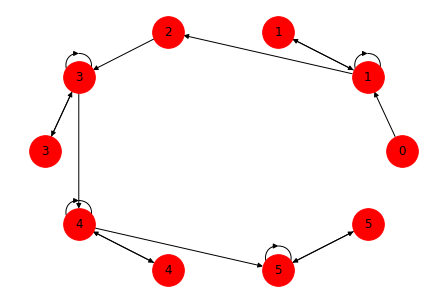

In [3]:
import numpy as np
import random as rm
import networkx as nx
import matplotlib.pyplot as plt
import pylab
from networkx.drawing.nx_agraph import to_agraph

class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None

class HashMap:
    def __init__(self):
        self.store = [None for _ in range(16)]
    def get(self, key):
        index = hash(key) & 15
        if self.store[index] is None:
            return None
        n = self.store[index]
        while True:
            if n.key == key:
                return n.value
            else:
                if n.next:
                    n = n.next
                else:
                    return None
    def put(self, key, value):
        nd = Node(key, value)
        index = hash(key) & 15
        n = self.store[index]
        if n is None:
            self.store[index] = nd
        else:
            if n.key == key:
                n.value = value
            else:
                while n.next:
                    if n.key == key:
                        n.value = value
                        return
                    else:
                        n = n.next
                n.next = nd

def add_edge(f_item, s_item, graph=None):
    graph.add_edge(f_item, s_item)

hm = HashMap()
hm.put(0,[])
hm.put(1,[])
hm.put(2,[])
hm.put(3,[])
hm.put(4,[])
hm.put(5,[])

keyValue = HashMap()
keyValue.put(0,"0")
keyValue.put(1,"1")
keyValue.put(2,"2")
keyValue.put(3,"3")
keyValue.put(4,"4")
keyValue.put(5,"5")




Matrix_P = [[0  ,1    ,0    ,0    ,0    ,0  ],
            [0  ,0.9  ,0.1  ,0    ,0    ,0  ],
            [0  ,0    ,0.8  ,0.2  ,0    ,0  ],
            [0  ,0    ,0    ,0.7  ,0.3  ,0  ],
            [0  ,0    ,0    ,0    ,0.6  ,0.4],
            [0  ,0    ,0    ,0    ,0    ,1  ]]

Matrix_C = [[1  ,-1   ,0    ,0     ,0     ,0   ],
            [0  ,0.1  ,-0.1 ,0     ,0     ,0   ],
            [0  ,0   ,0.2   ,-0.2  ,0     ,0   ],
            [0  ,0   ,0     ,0.3   ,-0.3  ,0   ],
            [0  ,0   ,0     ,0     ,0.4   ,-0.4],
            [0  ,0   ,0     ,0     ,0     ,1   ]]

Matrix_T = [[1  ,0  ,0  ,0  ,0  ,0],
            [0  ,1  ,0  ,0  ,0  ,0],
            [0  ,0  ,1  ,0  ,0  ,0],
            [0  ,0  ,0  ,1  ,0  ,0],
            [0  ,0  ,0  ,0  ,1  ,0],
            [0  ,0  ,0  ,0  ,0  ,1]]

Matrix_P_Sum = 0
k = 0
for i in Matrix_P:
    for j in range(len(i)):
        Matrix_P_Sum += Matrix_P[k][j]
    if Matrix_P_Sum > 1:
        print('Ошибка матрицы Р')
        break;
    Matrix_P_Sum = 0;
    k+=1

Matrix_T_Sum = 0
k = 0
for i in Matrix_T:
    for j in range(len(i)):
        Matrix_T_Sum += Matrix_T[k][j]
    if Matrix_T_Sum > 1:
        print('Ошибка матрицы Т')
        break;
    Matrix_T_Sum = 0;
    k+=1

start_state = 0
prev_state = start_state

print(start_state, '-->', end=" ")

graph_cords =[]

graph = nx.MultiDiGraph()

for i in range(1,100):
    current_state = np.random.choice([0,1,2,3,4,5], p = Matrix_P[prev_state])
    print(current_state, '-->', end=" ")
    current_list = hm.get(prev_state)
    if current_state not in current_list:
        current_list.append(current_state)
        hm.put(prev_state,current_list)
        graph_cords.append((prev_state,current_state))
        if prev_state == current_state:
            graph.add_node(keyValue.get(prev_state))
            graph_cords.append((prev_state,keyValue.get(prev_state)))
            graph_cords.append((keyValue.get(prev_state),prev_state))
    prev_state = current_state

graph = nx.MultiDiGraph(graph_cords)

print('-------------------------------------------------')

for i in range(0,6):
    print('Элемент', i, 'имеет связи с элементами', hm.get(i))

print('--------------------------------------------------------------------------')
inv_matrix_C = np.linalg.inv(Matrix_C)
print(inv_matrix_C)
print('--------------------------------------------------------------------------')
print('Сумма элементов первой строки обратной матрицы =', sum(inv_matrix_C[0]))

nx.draw_circular(graph,node_color='red',node_size=1000,with_labels=True)